In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

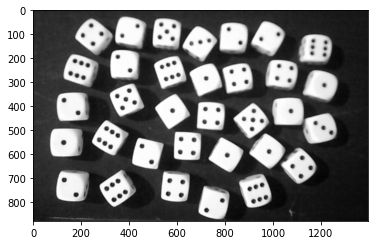

In [60]:
img = cv2.imread('images/twentythree.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

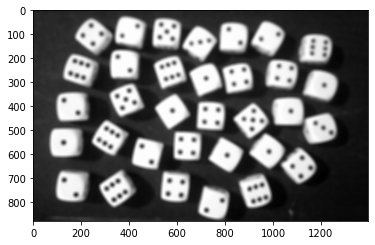

In [61]:
img = cv2.blur(img, (15, 15))
plt.imshow(img, cmap='gray')

In [62]:
print(img.shape)

(878, 1396)


In [63]:
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

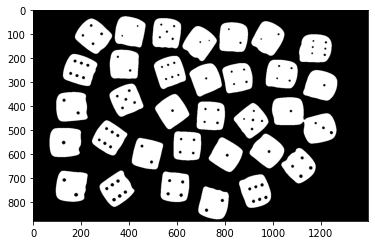

In [64]:
plt.imshow(thresh1, cmap='gray')

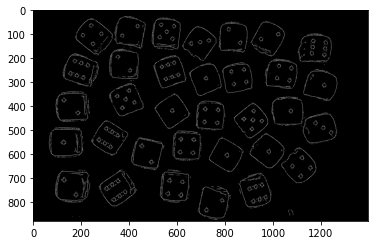

In [65]:
edges = cv2.Canny(img, 40, 40)
plt.imshow(edges, cmap = 'gray')

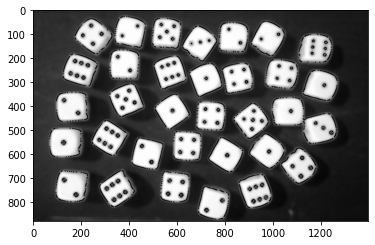

In [66]:
contours = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
canvas = np.zeros_like(img)
for contour in contours:
    cv2.drawContours(img, contour, -1, (0, 255, 0), 3)
plt.imshow(img, cmap='gray')

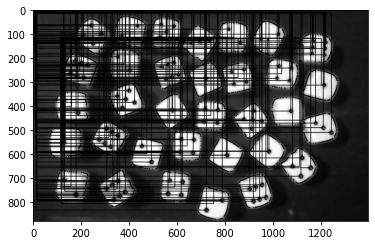

In [67]:
contours = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
diceRects = []
for contour in contours:
    rect = cv2.minAreaRect(contour)
    rect = ((int(rect[0][0]), int(rect[0][1])), (int(rect[1][0]), int(rect[1][1])), int(rect[2]))
    diceRects.append(rect)
    cv2.rectangle(img, rect[0], rect[1], (0, 0, 255), 2)

plt.imshow(img, cmap='gray')